# 1 引言
在展开数据分析工作是，我们经常会面临两种困境，一种是原始数据中特征属性太少，“巧妇难为无米之炊”，很难挖掘出潜在的规律，对于这种情况，我们只能在收集这一环节上多下功夫；另一种困境刚好相反，那就是特征属性太多，这真是一种幸福得烦恼，因为特征属性多就意味着信息量大，可挖掘的价值就大，但另一方面也可能造成过拟合和计算量的急剧增大，对于这一问题，最好的方法就是在预处理阶段对数据进行降维。  
说到降维，很自然得就想到主成分分析法(Principal Component Analysis，PCA)，因为这一方法在众多降维方法中独领风骚，应用的最为广泛。主成分分析法是一种无监督学习方法，它的主要观点是认为数据的特征属性之间存在线性相关，导致数据间的信息冗余，通过正交变换把线性相关的特征用较少线性无关的数据来表示，以达到降维的目的。  
本文接下来的内容就对PCA方法进行思想和运算过程等方面由浅入深地展开介绍。  


# 2 算法原理
## 2.1 最大投影方差法
为方便描述，我们先以二维平面上的数据集为例。如下图所示，有左下至右上45度角斜向上分布。现在，我们要对数据集进行降维，因为是二维数据，所以只需要找到一个条合适的坐标轴将数据投影过去即可。最简单地，我们可以将数据直接投影到已有的两个坐标轴上，如如图（a）（b）所示，这种方法相当于直接舍弃另一特征维度，将直接导致对另一特征维度信息的完全丢失，往往并不可取。降维过程虽然不可避免得会造成信息丢失，但我们却也希望最大化地保留数据的原始信息。既然往已有的坐标轴上投影不可取，那么，我们构造新的坐标系，如图（c）所示，我们沿左下至右上45度角斜向上构造出一条$y$轴，从自觉上判断我们也会觉得将数据投影到这个$y$轴比直接头引导$x1$轴、$x2$轴更加合适，因为这个时候$y$轴与数据分布最“契合”，数据的投影在$y$轴上最为分散，或者说数据在$y$轴上的投影的方差最大。这就是最大投影方差法，通过这种方法，在投影后的空间中数据的方差最大，才能最大化数据的差异性，因此可以保留更多的原始数据信息。

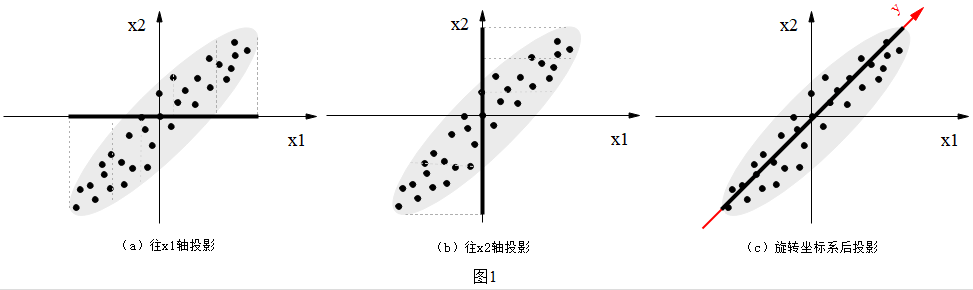

我们从数学角度上分析一下为什么方差最大是获得的新坐标系才是最好的。  
如下图2所示，假设我们点$A$、$B$、$C$为图1中数据集零均值化化后的样本点，点$A'$、$B'$、$C'$分别是点$A$、$B$、$C$在旋转后的$X1'$轴上的投影，$O$为坐标原点。$|AA'|$表示原坐标点$A$到$X1'$轴上投影$A'$的距离，又被称为投影误差。显然，投影误差越小，$A$与$A'$相似度越大，那么投影后的数据就保留了更多的信息，所以投影误差越小越好，等价地，对各样本点投影误差的平方和$|AA'{|^2} + |BB'{|^2} + |CC'{|^2}$也越大越好。因为斜边的长度$|OA|$、$|OB|$、$|OC|$是固定的，结合勾股定理可知，$|AA'{|^2} + |BB'{|^2} + |CC'{|^2} + |OA'{|^2} + |OB'{|^2} + |OC'{|^2}$的大小也是保持不变的，这就意味着，投影误差越小，$|OA'{|^2} + |OB'{|^2} + |OC'{|^2}$就越大。其实，$|OA'{|^2} + |OB'{|^2} + |OC'{|^2}$就是样本方差和，所以说，方差最大是获得的新坐标系最好。

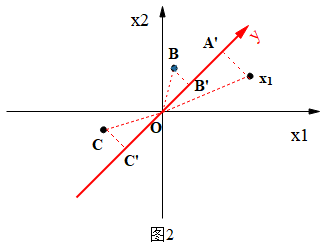

现在，我们知道了怎么确定最优的方向进行投影的问题，不过还有问题没有解决：  
（1）上面的讲述都是以二维数据为例子，对于二维数据的降维，当然只需要找到一个维度或者说一条坐标轴进行投影即可，如果是更高维度的数据进行降维时，就不可能都降为一维，这时候可就需要寻找到多条坐标轴来来投影，如果寻找第一个维度时，使用方差最大化投影当然没问题，但是，如果在寻找第二个维度时，仍然坚持方差最大化，那么第二个维度的坐标轴就回与第一个维度的坐标做基本重合，这样投影后的数据相关性极大，是没有意义的。那么，对于高维度数据降维，要如何确定多个维度坐标轴呢？  
（2）找到了新的坐标系后，怎么将原始数据映射到新的坐标系中呢？  
带着这两个问题，我们继续往下分析。
## 2.2 协方差矩阵
PCA算法降维的主要通过是降低原始数据中的冗余信息来实现的，这里的冗余信息指的是数据集中不同特征属性间的相关性，例如工作时长、学历、薪资待遇这三个属性，这确实是三个不同的特征属性，但无论是工作时长还是学历都跟薪资待遇之间存在一定影响，在大多数情况下，工作时长越长、学历越高薪资待遇就越高。所以，工作时长、学历与薪资待遇是存在相关性的，PCA算法目标就是消除这些相关性达到降维的目的。  
对于相关性，在数学上通常用协方差来进行描述。假设数据集$X$是包含$n$个样本，$m$个特征属性，$x_i$和$x_j$分别是数据集$X$中的两个不同的特征属性，那么$x_i$和$x_j$之间的协方差为：  
$$Cov({x_i},{x_j}) = \frac{1}{{n - 1}} \cdot \sum\nolimits_{k = 1}^n {({x_{ik}} - {{\bar x}_i})({x_{jk}} - {{\bar x}_j})} $$
式中，${{x_{ik}}}$，${{x_{jk}}}$表示$x_i$、$x_j$的第$k$个样本在两个特征属性中的取值，${{\bar x}_i}$、${{\bar x}_j}$分别是$x_i$,$x_j$的均值。  
协方差取值区间为$[-1,1]$，协方差绝对值越大两特征属性相关性越大，当协方差小于0时，表示两个特征属性呈负相关，当协方差大于0时，表示两个特征属性呈正相关，当协方差为0时，表示量特征属性不相关，在线性代数上，这两个特征属性时正交的。  
特殊地，$Cov({x_i},{x_i})$表示特征属性$x_i$的方差。  
通过上一小节，我们知道，降维时选择第一个投影方向是通过方差最大化进行选取，选取后续为投影方向时，我们就不可能再让降维后的各维度数据间还存在相关性，所以，在选取后续维度时需要在满足与所有已选取投影方向正交，即协方差为0的前提下，选取方差最大的方向。总结一下降维的过程，假如我们需要从$m$维降到$k$维，首先要在所有可能方向中选取一个投影方差最大的方向作为第一个维度，然后在所有与第一个维度正交的方向中选取一个方差最大的方向作为第二个维度方向，重复这一步骤，直到选取了$k$个维度。  
可以看出，在整个降维过程中，既要计算方差，也要计算特征属性两两之间的协方差，有没有什么方法将两者统一到一起呢？有，协方差矩阵。
协方差矩阵中每一个元素对应两个特征属性间的协方差，例如第$i$行第$j$列元素表示第$i$个特征属性与第$j$个特征属性间的协方差；协方差矩阵对角线上的元素，当$i=j$时，表示第$i$个特征属性的方差。数据集$X$的协方差矩阵表示为：
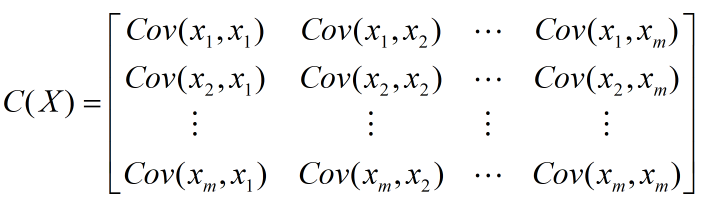

仔细观察协方差矩阵，可以发现协方差矩阵是实对称矩阵，实对称矩阵刚好有一些很好的性质可以被利用：  
（1）实对称矩阵必可对角化，且其相似对角矩阵的对角线元素为$m$个特征值  
（2）实对称矩阵的特征值是实数，特征向量是实向量  
（3）实对称矩阵的不同特征值对应的特征向量是正交的  
请务必注意，这三个性质很重要，不理解没关系，记住就好，接下来的内容都必须以这三个性质为基础。因为特征值对应的特征向量就是理想中想取得正确的坐标轴的基，而特征值就等于数据在投影之后的坐标上的方差。所以有了协方差矩阵，接下来要做的，就是将协方差矩阵对角化，这个对角化的过程可以理解为是对来原坐标轴的旋转即寻找最佳投影坐标轴的过程，通过对角化的过程可以让除对角元素外的所有元素为零，也就是协方差为零，各特征属性将将变得不相关。当协方差矩阵对角化之后，对角元素就是特征值，也是各投影后坐标轴上的方差，我们选取最大的一个特征值对应的特征向量作为基，对原始数据进行变换，就可以用获得原始数据在新坐标轴上的投影。  
我们大概描述一下这个坐标变换的原理。在机器学习中，我们喜欢用向量和矩阵来表示数据，因为向量和矩阵有很多很好的数学性质，可以很方便的进行数学运算。如下图3所示，从图1所示数据集中取一点，假设坐标为（3,1），那么我们可以表示为以原点为起点以点（3,1）为终点的一个箭头，这个箭头在x1轴上投影为3，在x2轴三的投影是1。我们可以这么理解，有一个向量在两条坐标轴上的投影分别为$x_1$，$x_2$，那么该向量又可以表示为：$x_1 \cdot {(1,0)^T} + x_2 \cdot {(0,1)^T}$，这里的(1,0)和(0,1)就是下图黑色直角坐标系的一组基。对于基，可以粗浅的理解为坐标轴的基础，有了基，坐标才有意义，在大多数情况下，我们都默认以(1,0)和(0,1)这对相互正交且模长为1向量为基。如果我们对黑色直角坐标系逆时针旋转45就得到了一个新的坐标系，这个坐标系的基为$(\frac{1}{{\sqrt 2 }},\frac{1}{{\sqrt 2 }})$和$( - \frac{1}{{\sqrt 2 }},\frac{1}{{\sqrt 2 }})$，这类我们不深入讨论这个基是怎么得来的，反正在PCA方法中通过协方差对角化之后多的的特征值对应特征向量就是新坐标系的基。有了新坐标系的基，怎么将原坐标系的坐标转换的用新坐标系表示呢？其实我们只需要对新坐标系的基与原坐标系中的坐标进行内积运算即可：将原坐标与两个基做内积运算，获得的两个结果分别作为新坐标系的第一个坐标和第二个坐标，这个过程叫做基变换，我们用矩阵运算来表示这个过程：

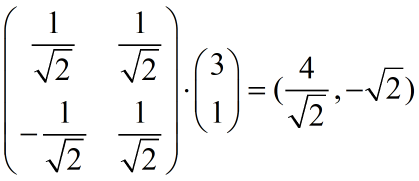

所以点$（3,1）$在新坐标系中的坐标为$(\frac{4}{{\sqrt 2 }}, - \sqrt 2 )$。这种基变换的方式也适用于更加多维的情况，因为两个矩阵相乘本质就是一种线性变换，也可以理解为将游标矩阵中的每一列列向量变换到左边矩阵中每一行行行向量为基坐标是的空间中去。

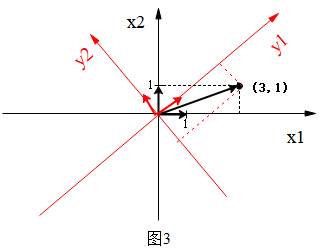

总结来说，完成对角化之后，矩阵中对角线上元素就是特征值，也是寻找到的众多坐标轴的投影方差，每次从中去所有特征值中最大的一个，然后求对应的特征向量，这个特征向量就是对应的新坐标轴的基，用这个基于原始数据做内积运算就可以得到原始数据在新坐标轴上的投影，重复这个过程$k$次，就完成可降维。  
将上文中所有内容囊括在一起，那么，主成分分析法就概括为以下5各步骤：  
（1) 零平均值，在很多情况下，为了去除量纲的影响，最好直接标准化。  
（2） 计算协方差矩阵。  
（3） 协方差矩阵对角化，求特征值。   
（4） 对特征值从大到小排序，选择其中最大的$k$个，然后求其对应的k个特征向量分别作为行向量组成特征向量矩阵P。  
（5） 将k个特征向量作为新的坐标系的基对原始数据进行变换。  

# 3 总结
PCA算法是一种无监督学习方法，只需要对数据集本身的特征属性进行运算，消除相关性达到压缩数据去噪降维的目的。
 PCA算法的主要优点有：  
（1）仅仅需要以方差衡量信息量，不受数据集以外的因素影响。   
（2）各主成分之间正交，可消除原始数据成分间的相互影响的因素。  
（3）计算方法简单，易于实现。  
PCA算法的主要缺点有：  
（1）主成分各个特征维度的含义不在具有实际的物理意义，所以不如原始样本特征的解释性强。  
（2）方差小的非主成分也可能含有对样本差异的重要信息，因降维丢弃可能对后续数据处理有影响。  